In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

Write a program to segment the boat and the people on it from the background.

In [22]:
img = cv.imread('boat.jpg', 0)

blur = cv.GaussianBlur(img, (5, 5), 0) 
ret, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

th = cv.bitwise_not(th)

contours, hierarchy = cv.findContours(th, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

th = cv.cvtColor(th, cv.COLOR_GRAY2BGR)


for cnt in contours:
    x,y,w,h = cv.boundingRect(cnt)
    roi=th[y:y+h,x:x+w]
    cv.rectangle(th,(x,y),(x+w,y+h),(200,0,0),2)

cv.imshow('segmented image',th)
cv.waitKey(0)
cv.destroyAllWindows()

Write a program to visualize the effect of size of structuring element on the morphological transformation

In [2]:
#applying erosion
img = cv.imread('leaf.jfif')

struc_ele = np.ones((3,3), dtype = np.uint8)

erode = cv.erode(img, struc_ele, iterations = 1)


def trackbar(x):
    ret, th = cv.threshold(img, x, 255, cv.THRESH_BINARY)    
    cv.imshow('window', th)
 
cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

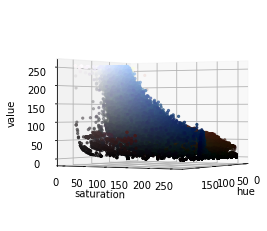

In [19]:
#porcelian1
img = cv.imread('porcelain1.jfif')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h,s,v=cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")

pixel_colors= img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin = 0., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolor = pixel_colors, marker = ".")
axis.view_init(0,30)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")

plt.show()

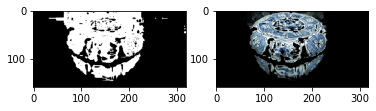

In [22]:
blue_light = (75, 0, 0)
blue_dark = (110, 250, 255)

mask = cv.inRange(img_hsv, blue_light, blue_dark)
result = cv.bitwise_and(img, img, mask=mask)

plt.subplot(1,2,1)
plt.imshow(mask, 'gray')
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

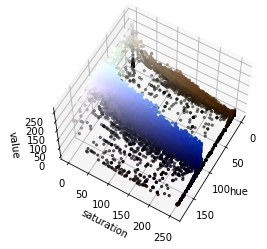

In [28]:
#porcelain2
img = cv.imread('porcelain2.jfif')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h,s,v=cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")

pixel_colors= img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin = 0., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolor = pixel_colors, marker = ".")
axis.view_init(60,30)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")

plt.show()

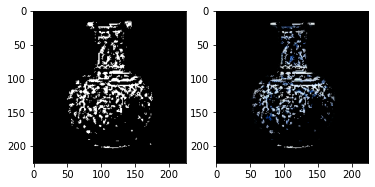

In [31]:
blue_light = (80, 0, 0)
blue_dark = (110, 250, 255)

mask = cv.inRange(img_hsv, blue_light, blue_dark)
result = cv.bitwise_and(img, img, mask=mask)

plt.subplot(1,2,1)
plt.imshow(mask, 'gray')
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

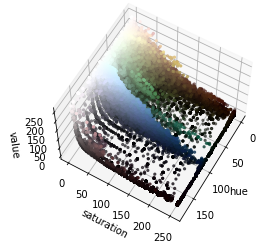

In [33]:
#porcelain3
img = cv.imread('porcelain3.jfif')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h,s,v=cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")

pixel_colors= img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin = 0., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolor = pixel_colors, marker = ".")
axis.view_init(60,30)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")

plt.show()

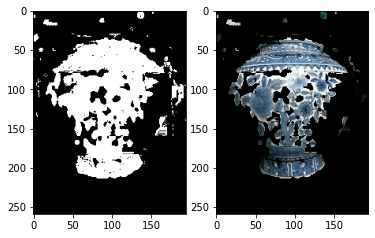

In [34]:
blue_light = (75, 0, 0)
blue_dark = (110, 250, 255)

mask = cv.inRange(img_hsv, blue_light, blue_dark)
result = cv.bitwise_and(img, img, mask=mask)

plt.subplot(1,2,1)
plt.imshow(mask, 'gray')
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

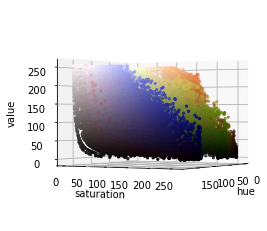

In [37]:
#porcelain4
img = cv.imread('porcelain4.jfif')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h,s,v=cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")

pixel_colors= img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin = 0., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolor = pixel_colors, marker = ".")
axis.view_init(0,30)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")

plt.show()

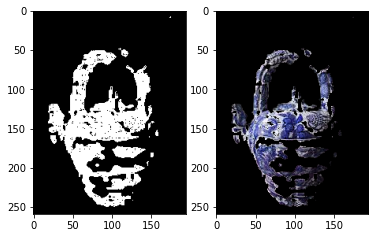

In [38]:
blue_light = (100, 0, 0)
blue_dark = (150, 250, 255)

mask = cv.inRange(img_hsv, blue_light, blue_dark)
result = cv.bitwise_and(img, img, mask=mask)

plt.subplot(1,2,1)
plt.imshow(mask, 'gray')
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

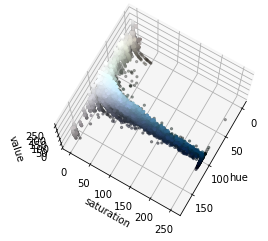

In [41]:
#porcelain5
img = cv.imread('porcelain5.jfif')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h,s,v=cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")

pixel_colors= img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin = 0., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolor = pixel_colors, marker = ".")
axis.view_init(75,30)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")

plt.show()

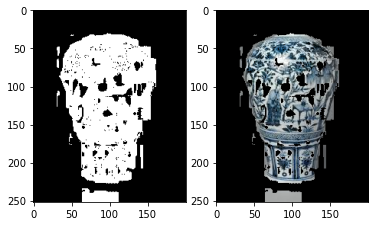

In [42]:
blue_light = (75, 0, 0)
blue_dark = (110, 250, 255)

mask = cv.inRange(img_hsv, blue_light, blue_dark)
result = cv.bitwise_and(img, img, mask=mask)

plt.subplot(1,2,1)
plt.imshow(mask, 'gray')
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()